In [1]:
# This notebook is to make Figure 1 of Rodgers et al. 2021 (https://doi.org/10.5194/esd-2021-50). 
# If you have have any questions, please contact the author of this notebook.
# Author: Ryohei Yamaguchi (ryamaguchi  at  pusan.ac.kr)

# Time seriese used in this notebook are created by Figure_1_observations.ipynb, Figure_1_LE_ocn-ice.ipynb, and Figure_1_LE_atm-lnd.ipynb

In [2]:
%matplotlib inline

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

from datetime import datetime
today = datetime.today()

In [3]:
in_dir='/proj/ryamaguchi/CESM2_LENS/time.series/'

ts_tref = xr.open_dataset(in_dir+'210520_global.TREFHT.100-members_3-seg-patched.nc')
ts_fsnt = xr.open_dataset(in_dir+'210520_global.FSNT.100-members_3-seg-patched.nc')
ts_flnt = xr.open_dataset(in_dir+'210520_global.FLNT.100-members_3-seg-patched.nc')
ts_prec = xr.open_dataset(in_dir+'210520_global.PRECT.100-members_3-seg-patched.nc')
ts_amoc = xr.open_dataset(in_dir+'210520_.AMOC.100-members_3-seg-patched.nc')
ts_ianh = xr.open_dataset(in_dir+'210520_NH.aice_d.100-members_3-seg-patched.nc')
ts_iash = xr.open_dataset(in_dir+'210520_SH.aice_d.100-members_3-seg-patched.nc')
ts_lnpp = xr.open_dataset(in_dir+'210520_global.NPP.100-members_3-seg-patched.nc')
ts_onpp = xr.open_dataset(in_dir+'210520_global.photoC_TOT_zint.100-members_3-seg-patched.nc')
ts_lcfx = xr.open_dataset(in_dir+'210520_global.NBP.100-members_3-seg-patched.nc')
ts_ocfx = xr.open_dataset(in_dir+'210520_global.FG_CO2.100-members_3-seg-patched.nc')
ts_ohc2 = xr.open_dataset(in_dir+'210520_global.OHC2000.100-members_3-seg-patched.nc')

In [4]:
tso_tsur = xr.open_dataset('/proj/ryamaguchi/CESM2_LENS/time.series/obs/210318_global.TS.HadCRUT4.nc')
tso_toai = xr.open_dataset('/proj/ryamaguchi/CESM2_LENS/time.series/obs/210318_global.TOA.CERES-EBAF.nc')
tso_prec = xr.open_dataset('/proj/ryamaguchi/CESM2_LENS/time.series/obs/210318_global.PREC.GPCP.nc')
tso_ianh = xr.open_dataset('/proj/ryamaguchi/CESM2_LENS/time.series/obs/210322_Arctic.ICE_EXTENT.NSIDC-SII.nc')
tso_iash = xr.open_dataset('/proj/ryamaguchi/CESM2_LENS/time.series/obs/210322_Antarctic.ICE_EXTENT.NSIDC-SII.nc')
tso_amoc = xr.open_dataset('/proj/ryamaguchi/CESM2_LENS/time.series/obs/210318_AMOC.RAPID.nc')
tso_ohci = xr.open_dataset('/proj/ryamaguchi/CESM2_LENS/time.series/obs/210326_global.OHC_2000.Ishii2017.nc') 

In [5]:
syr,eyr,tyr,dyr=1850,2100,2015,50
nts = 8

yliml=np.zeros([nts])
ylimu=np.zeros([nts])
lc=['','','','','','','','']

PREC 2.943166192343323 0.0028626131996658585 2.6898532
GMST 14.320202853693425 0.025482781813659695 13.892084
OHC 17691.719692836174 38.84100873760868 -24.31172922727273
ICE_NH 10.469471298565328 0.15862051995320495 11.405210317460316
ICE_SH 10.58453531631508 0.1354000946670458 11.603194444444444
AMOC 18.366938 0.4150005578994751 16.85138400444595


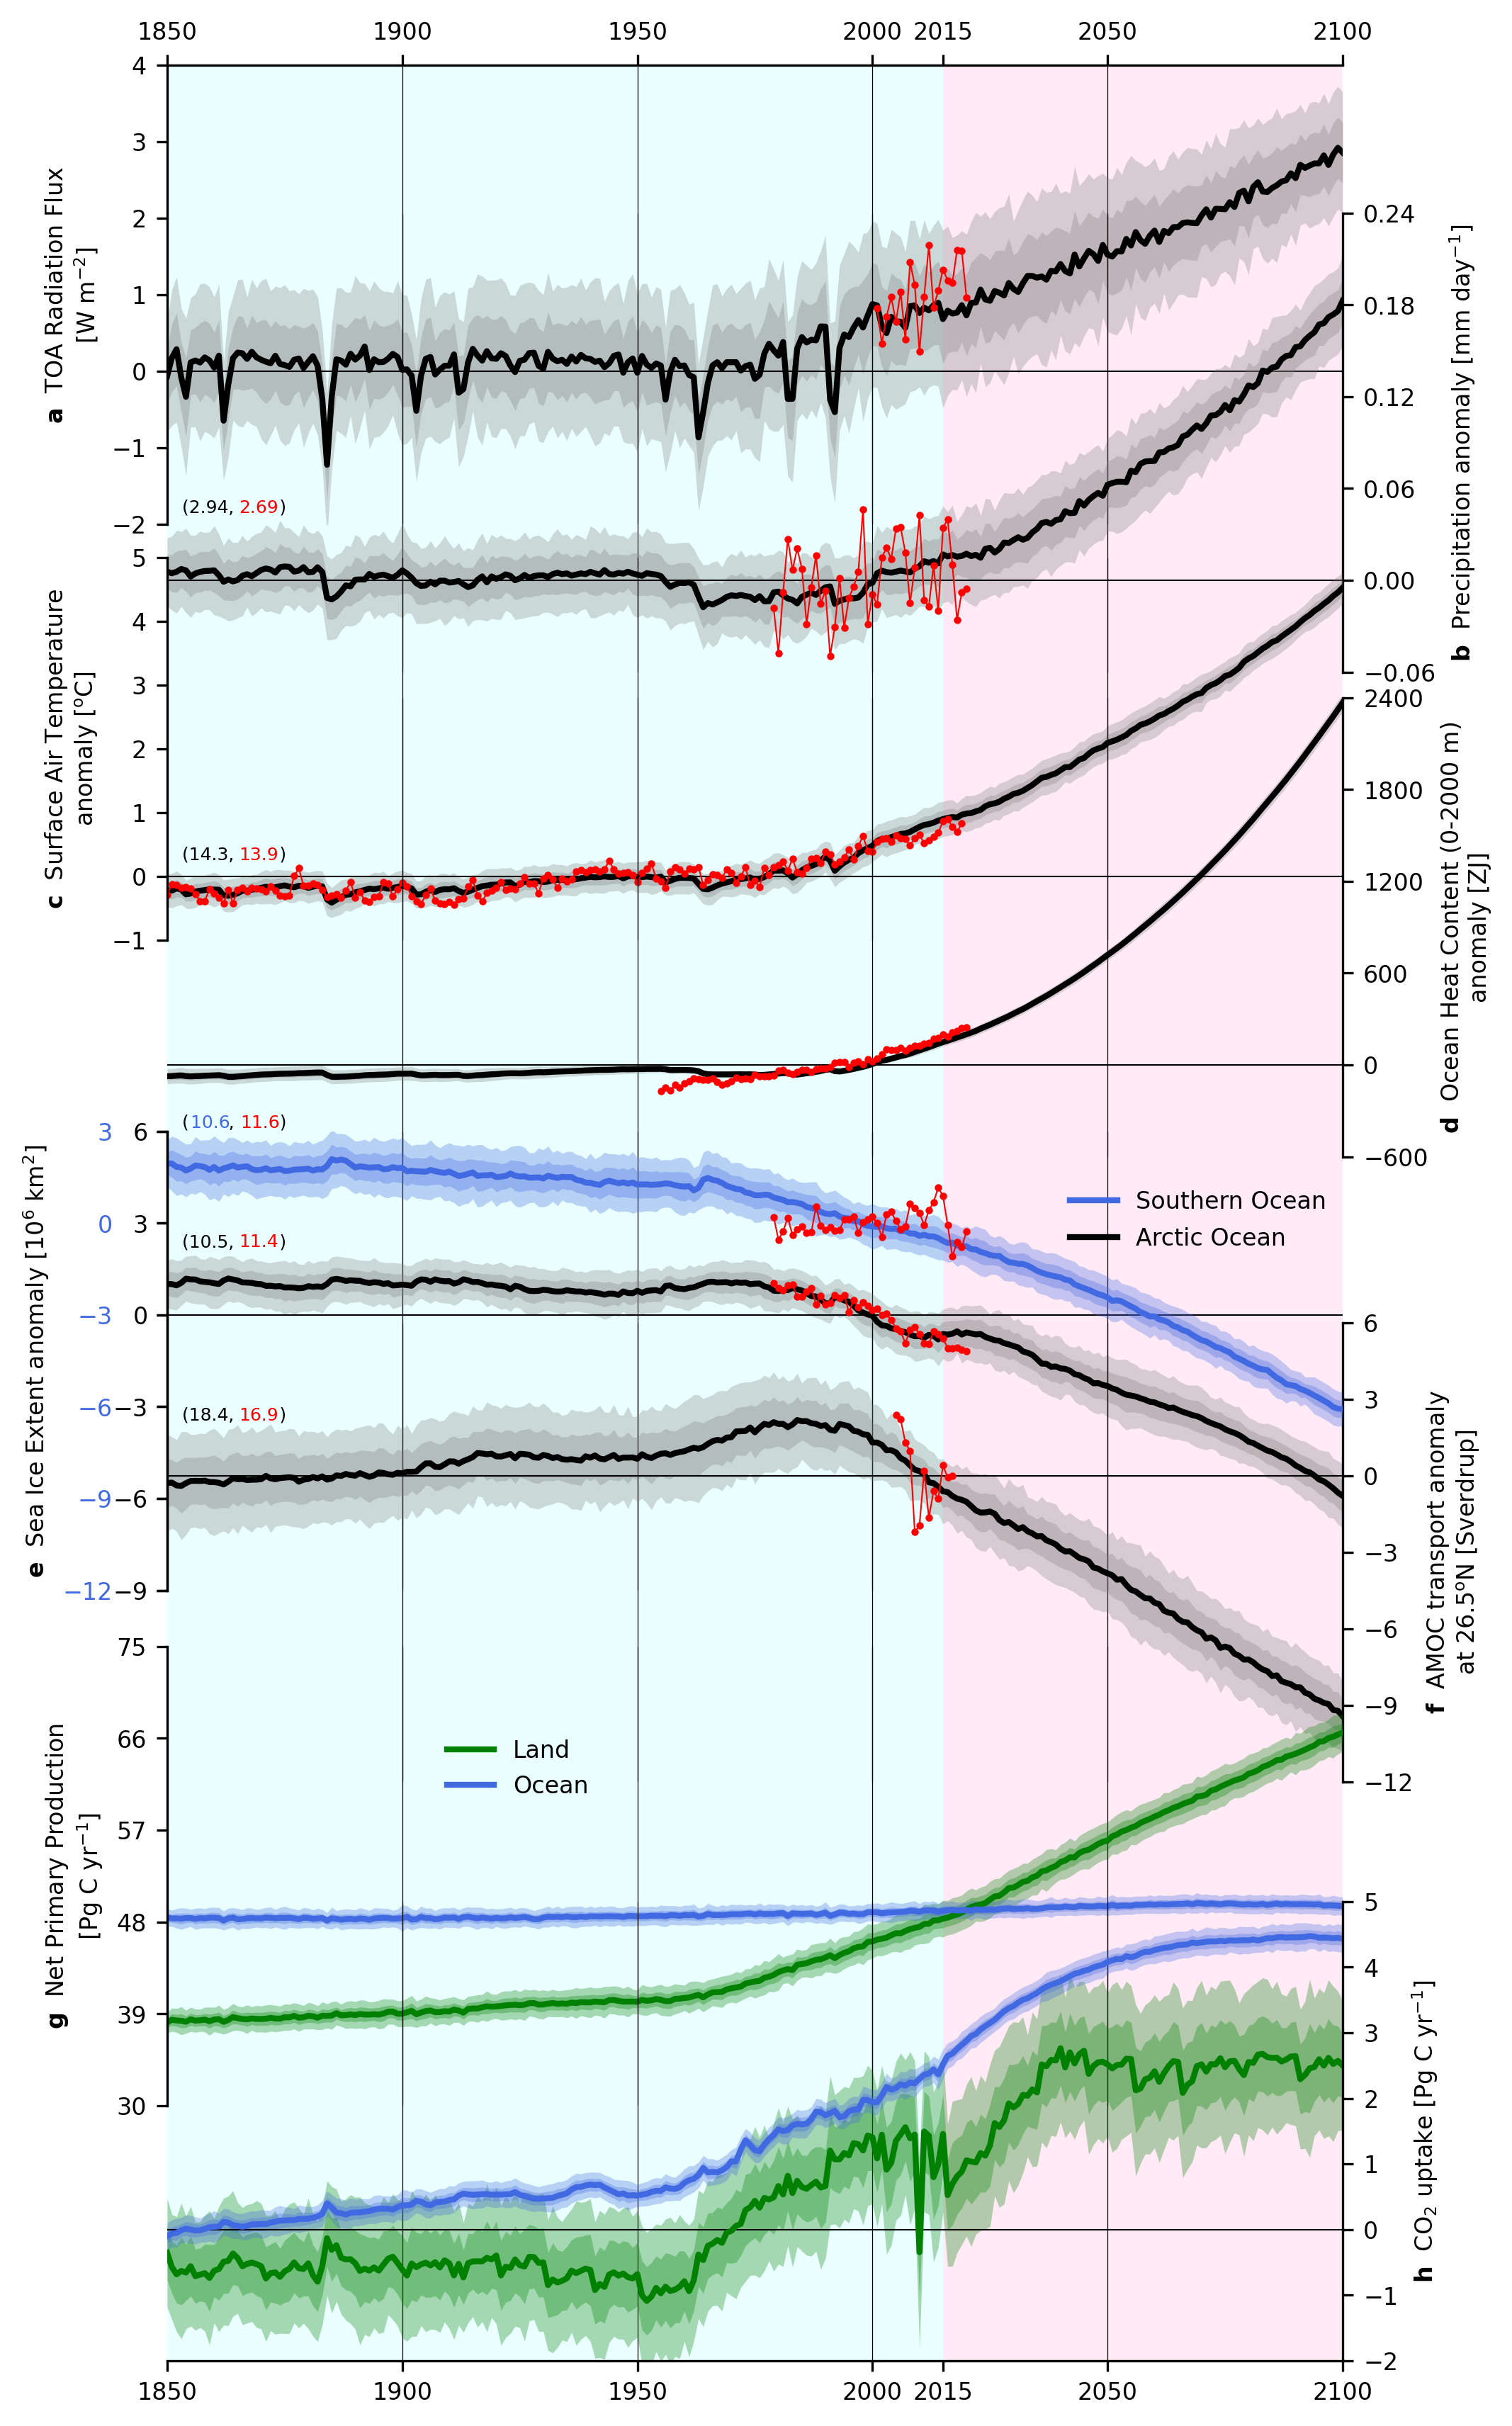

In [6]:
plt.rcParams["font.size"] = 8

fx,fy=7,12
ofx=0.105
ofy=0.05

fig = plt.figure(figsize=(fx,fy),dpi=300,facecolor='white')

axb = plt.axes([0+ofx, 0+ofy, 1-2*ofx, 1-2*ofy] )   # [left,bottom,width,height], (0~1), (left&bottom&width)=(last figure), (height)=(total height)
axb.tick_params(left=False,bottom=False)
axb.set_yticklabels([])
axb.set_xticklabels([])
axb.spines['top'   ].set_visible(False)
axb.spines['bottom'].set_visible(False)
axb.spines['right' ].set_visible(False)
axb.spines['left'  ].set_visible(False)
axb.set_xlim(syr,eyr)
axb.axvspan(tyr,eyr,color='#FF33AF',alpha=0.1,lw=0)
axb.axvspan(syr,tyr,color='#33FFFF',alpha=0.1,lw=0)


dx=1-2*ofx
dy=(1.-2*ofy)/(nts-3)

ax1 = plt.axes([0+ofx, 1-ofy-dy ,dx, dy])
ax2 = plt.axes([0+ofx, 6/nts+ofy-0.088,dx, dy])
ax3 = plt.axes([0+ofx, 5/nts+ofy-0.068,dx, dy-0.03])
ax4 = plt.axes([0+ofx, 4/nts+ofy-0.028,dx, dy])
ax5 = plt.axes([0+ofx, 3/nts+ofy-0.073,dx, dy])
ax6 = plt.axes([0+ofx, 2/nts+ofy-0.023,dx, dy])
ax7 = plt.axes([0+ofx, 1/nts+ofy-0.025,dx, dy])
ax8 = plt.axes([0+ofx, 0/nts+ofy,dx, dy])
ax=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
###TOA###
i=0

ts =(ts_fsnt.FSNT-ts_flnt.FLNT).groupby('time.year').mean()
tso=tso_toai.toa_net_all_mon.groupby('time.year').mean()

unit='W m$^{-2}$'
ylabel='$\mathbf{a}$  TOA Radiation Flux\n[%s]'%unit
lc[i]='black'
sc='gray'
oc='red'
ol='CERES_EBAF'
yliml[i],ylimu[i]=-2,4

osyr,oeyr=tso.year.values[0],tso.year.values[-1]

ax[i].plot(np.arange(syr,eyr+1),ts.mean('ensemble'),lw=2,c=lc[i])
ax[i].fill_between(np.arange(syr,eyr+1),ts.mean('ensemble')-1*ts.std('ensemble'),ts.mean('ensemble')+1*ts.std('ensemble'),lw=0,color=sc,alpha=0.3)
ax[i].fill_between(np.arange(syr,eyr+1),ts.mean('ensemble')-2*ts.std('ensemble'),ts.mean('ensemble')+2*ts.std('ensemble'),lw=0,color=sc,alpha=0.3)
ax[i].plot(np.arange(osyr,oeyr+1),tso,lw=.5,c=oc,label=ol,marker='.',markersize=3)
ax[i].set_ylabel(ylabel,color=lc[i])
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
###PREC###
i=1

ts =(ts_prec.PRECT*(1e3)*60*60*24).groupby('time.year').mean()            #m/s -> mm/day
tso=tso_prec.PREC.groupby('time.year').mean()

unit='mm day$^{-1}$'
ylabel='$\mathbf{b}$  Precipitation anomaly [%s]'%unit
lc[i]='black'
sc='gray'
oc='red'
yliml[i],ylimu[i]=-0.06,0.24

osyr,oeyr=tso.year.values[0],tso.year.values[-1]

print('PREC',ts.sel(year=slice(osyr,oeyr)).mean(('year','ensemble')).values,ts.sel(year=slice(osyr,oeyr)).mean('year').std('ensemble').values,tso.sel(year=slice(osyr,oeyr)).mean('year').values)
mean_m_prec=ts.sel(year=slice(osyr,oeyr)).mean(('year','ensemble')).values
mean_o_prec=tso.sel(year=slice(osyr,oeyr)).mean('year').values

ts=ts-ts.sel(year=slice(osyr,oeyr)).mean('year')
tso=tso-tso.sel(year=slice(osyr,oeyr)).mean('year')

ax[i].plot(np.arange(syr,eyr+1),ts.mean('ensemble'),lw=2,c=lc[i])
ax[i].fill_between(np.arange(syr,eyr+1),ts.mean('ensemble')-1*ts.std('ensemble'),ts.mean('ensemble')+1*ts.std('ensemble'),lw=0,color=sc,alpha=0.3)
ax[i].fill_between(np.arange(syr,eyr+1),ts.mean('ensemble')-2*ts.std('ensemble'),ts.mean('ensemble')+2*ts.std('ensemble'),lw=0,color=sc,alpha=0.3)
ax[i].plot(np.arange(osyr,oeyr+1),tso,lw=.5,c=oc,marker='.',markersize=3)
ax[i].set_ylabel(ylabel,color=lc[i])
ax[i].set_yticks(np.linspace(yliml[i],ylimu[i],6))
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
###GMST###
i=2

ts =(ts_tref.TREFHT-273.15).groupby('time.year').mean()            # TS -> (ts_tsur.TS-273.15)
tso=tso_tsur.TS.groupby('time.year').mean()     #HadCRUT4

unit='$^{\mathrm{o}}$C'
ylabel='$\mathbf{c}$  Surface Air Temperature\nanomaly [%s]'%unit
lc[i]='black'
sc='gray'
oc='red'
yliml[i],ylimu[i]=-1,5

osyr,oeyr=tso.year.values[0],tso.year.values[-1]

print('GMST',ts.sel(year=slice(osyr,oeyr)).mean(('year','ensemble')).values,ts.sel(year=slice(osyr,oeyr)).mean('year').std('ensemble').values,tso.sel(year=slice(osyr,oeyr)).mean('year').values)
mean_m_tref=ts.sel(year=slice(osyr,oeyr)).mean(('year','ensemble')).values
mean_o_tref=tso.sel(year=slice(osyr,oeyr)).mean('year').values

ts=ts-ts.sel(year=slice(osyr,oeyr)).mean('year')
tso=tso-tso.sel(year=slice(osyr,oeyr)).mean('year')

ax[i].plot(np.arange(syr,eyr+1),ts.mean('ensemble'),lw=2,c=lc[i])
ax[i].fill_between(np.arange(syr,eyr+1),ts.mean('ensemble')-1*ts.std('ensemble'),ts.mean('ensemble')+1*ts.std('ensemble'),lw=0,color=sc,alpha=0.3)
ax[i].fill_between(np.arange(syr,eyr+1),ts.mean('ensemble')-2*ts.std('ensemble'),ts.mean('ensemble')+2*ts.std('ensemble'),lw=0,color=sc,alpha=0.3)
ax[i].plot(np.arange(osyr,oeyr+1),tso,lw=.5,c=oc,marker='.',markersize=3)
ax[i].set_ylabel(ylabel,color=lc[i])
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
###OHC###
i=3

ts =ts_ohc2.OHC2000.groupby('time.year').mean()*1e-21        #J -> ZJ         
tso=tso_ohci.OHC_2000.groupby('time.year').mean()  #Ishii

unit='ZJ'
ylabel='$\mathbf{d}$  Ocean Heat Content (0-2000 m)\nanomaly [%s]'%unit
lc[i]='black'
sc='gray'
oc='red'
yliml[i],ylimu[i]=-600,2400

osyr,oeyr=tso.year.values[0],tso.year.values[-1]

print('OHC',ts.sel(year=slice(osyr,oeyr)).mean(('year','ensemble')).values,ts.sel(year=slice(osyr,oeyr)).mean('year').std('ensemble').values,tso.sel(year=slice(osyr,oeyr)).mean('year').values)


ts=ts-ts.sel(year=slice(osyr,oeyr)).mean('year')
tso=tso-tso.sel(year=slice(osyr,oeyr)).mean('year')

ax[i].plot(np.arange(syr,eyr+1),ts.mean('ensemble'),lw=2,c=lc[i])
ax[i].fill_between(np.arange(syr,eyr+1),ts.mean('ensemble')-1*ts.std('ensemble'),ts.mean('ensemble')+1*ts.std('ensemble'),lw=0,color=sc,alpha=0.3)
ax[i].fill_between(np.arange(syr,eyr+1),ts.mean('ensemble')-2*ts.std('ensemble'),ts.mean('ensemble')+2*ts.std('ensemble'),lw=0,color=sc,alpha=0.3)
ax[i].plot(np.arange(osyr,oeyr+1),tso,lw=.5,c=oc,marker='.',markersize=3)
ax[i].set_ylabel(ylabel,color=lc[i])
ax[i].set_yticks(np.linspace(yliml[i],ylimu[i],6))
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
###ICE###
i=4

tsn =ts_ianh.aice_d.groupby('time.year').mean()*1e-12     #m2 -> 10^6 km^2 
tss =ts_iash.aice_d.groupby('time.year').mean()*1e-12     #m2 -> 10^6 km^2
tson=tso_ianh.aice.groupby('time.year').mean()
tsos=tso_iash.aice.groupby('time.year').mean()

unit='10$^{6}$ km$^{2}$'
ylabel='$\mathbf{e}$  Sea Ice Extent anomaly [%s]'%unit
lc[i],lc1='black','royalblue'
sc,sc1='gray','royalblue'
oc,oc1='red','red'
yliml[i],ylimu[i]=-9,6

osyr,oeyr=tsos.year.values[0],tson.year.values[-1]

print('ICE_NH',tsn.sel(year=slice(osyr,oeyr)).mean(('year','ensemble')).values,tsn.sel(year=slice(osyr,oeyr)).mean('year').std('ensemble').values,tson.sel(year=slice(osyr,oeyr)).mean('year').values)
mean_m_icnh=tsn.sel(year=slice(osyr,oeyr)).mean(('year','ensemble')).values
mean_o_icnh=tson.sel(year=slice(osyr,oeyr)).mean('year').values
print('ICE_SH',tss.sel(year=slice(osyr,oeyr)).mean(('year','ensemble')).values,tss.sel(year=slice(osyr,oeyr)).mean('year').std('ensemble').values,tsos.sel(year=slice(osyr,oeyr)).mean('year').values)
mean_m_icsh=tss.sel(year=slice(osyr,oeyr)).mean(('year','ensemble')).values
mean_o_icsh=tsos.sel(year=slice(osyr,oeyr)).mean('year').values

tsn=tsn-tsn.sel(year=slice(osyr,oeyr)).mean('year')
tson=tson-tson.sel(year=slice(osyr,oeyr)).mean('year')
tss=tss-tss.sel(year=slice(osyr,oeyr)).mean('year')
tsos=tsos-tsos.sel(year=slice(osyr,oeyr)).mean('year')

ax[i].plot(np.arange(syr,eyr+1),tsn.mean('ensemble'),lw=2,c=lc[i],label='Arctic Ocean')
ax[i].fill_between(np.arange(syr,eyr+1),tsn.mean('ensemble')-1*tsn.std('ensemble'),tsn.mean('ensemble')+1*tsn.std('ensemble'),lw=0,color=sc ,alpha=0.3)
ax[i].fill_between(np.arange(syr,eyr+1),tsn.mean('ensemble')-2*tsn.std('ensemble'),tsn.mean('ensemble')+2*tsn.std('ensemble'),lw=0,color=sc ,alpha=0.3)
ax[i].plot(np.arange(osyr,oeyr+1),tson,lw=.5,c=oc ,marker='.',markersize=3)
ax[i].set_ylabel('')
ax[i].set_yticks(np.linspace(-9,6,6))
ax[i].tick_params(axis='y',pad=3)

tax=ax[i].twinx()

tax.plot(np.arange(syr,eyr+1),tss.mean('ensemble'),lw=2,c=lc1  ,label='Southern Ocean')
tax.fill_between(np.arange(syr,eyr+1),tss.mean('ensemble')-1*tss.std('ensemble'),tss.mean('ensemble')+1*tss.std('ensemble'),lw=0,color=sc1,alpha=0.3)
tax.fill_between(np.arange(syr,eyr+1),tss.mean('ensemble')-2*tss.std('ensemble'),tss.mean('ensemble')+2*tss.std('ensemble'),lw=0,color=sc1,alpha=0.3)
tax.plot(np.arange(osyr,oeyr+1),tsos,lw=.5,c=oc1,marker='.',markersize=3)

tax.set_ylim(-12,3)
tax.set_yticks(np.linspace(-12,3,6))
tax.tick_params(axis='y',pad=15,labelcolor='royalblue')
tax.set_ylabel(ylabel,color=lc[i])
tax.yaxis.set_label_position('left')
tax.yaxis.tick_left()
tax.spines['right'].set_visible(False)
tax.spines['top'].set_visible(False)
tax.spines['bottom'].set_visible(False)

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
###AMOC###
i=5

ts =ts_amoc.AMOC.isel(lat_aux_grid=274).groupby('time.year').mean() # 26.5N=274 or 275
tso=tso_amoc.moc_mar_hc10.groupby('time.year').mean()

unit='Sverdrup'
ylabel='$\mathbf{f}$  AMOC transport anomaly\nat 26.5$^{\mathrm{o}}$N [%s]'%unit
lc[i]='black'
sc='gray'
oc='red'
yliml[i],ylimu[i]=-12,6

osyr,oeyr=tso.year.values[0],tso.year.values[-1]

print('AMOC',ts.sel(year=slice(osyr,oeyr)).mean(('year','ensemble')).values,ts.sel(year=slice(osyr,oeyr)).mean('year').std('ensemble').values,tso.sel(year=slice(osyr,oeyr)).mean('year').values)
mean_m_amoc=ts.sel(year=slice(osyr,oeyr)).mean(('year','ensemble')).values
mean_o_amoc=tso.sel(year=slice(osyr,oeyr)).mean('year').values

ts=ts-ts.sel(year=slice(osyr,oeyr)).mean('year')
tso=tso-tso.sel(year=slice(osyr,oeyr)).mean('year')

ax[i].plot(np.arange(syr,eyr+1),ts.mean('ensemble'),lw=2,c=lc[i])
ax[i].fill_between(np.arange(syr,eyr+1),ts.mean('ensemble')-1*ts.std('ensemble'),ts.mean('ensemble')+1*ts.std('ensemble'),lw=0,color=sc,alpha=0.3)
ax[i].fill_between(np.arange(syr,eyr+1),ts.mean('ensemble')-2*ts.std('ensemble'),ts.mean('ensemble')+2*ts.std('ensemble'),lw=0,color=sc,alpha=0.3)
ax[i].plot(np.arange(osyr,oeyr+1),tso,lw=.5,c=oc,marker='.',markersize=3)
ax[i].set_ylabel(ylabel,color=lc[i])
ax[i].set_yticks(np.linspace(yliml[i],ylimu[i],7))
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
###NPP###
i=6

ts1=(ts_lnpp.NPP*(1e-15)*60*60*24*365).groupby('time.year').mean()                    # gC s-1 -> PgC year-1
ts2=(ts_onpp.photoC_TOT_zint*(12.)*(1e-3)*(1e-2)*(1e-15)*60*60*24*365).groupby('time.year').mean()        # mmol m-1 cm s-1 -> PgC year-1

unit='Pg C yr$^{-1}$'
ylabel='$\mathbf{g}$  Net Primary Production\n[%s]'%unit
lc[i],lc1,lc2='black','green','royalblue'
sc,sc1='green','royalblue'
yliml[i],ylimu[i]=30,75

ax[i].plot(np.arange(syr,eyr+1),ts1.mean('ensemble'),lw=2,c=lc1,label='Land')
ax[i].plot(np.arange(syr,eyr+1),ts2.mean('ensemble'),lw=2,c=lc2,label='Ocean')
ax[i].fill_between(np.arange(syr,eyr+1),ts1.mean('ensemble')-1*ts1.std('ensemble'),ts1.mean('ensemble')+1*ts1.std('ensemble'),lw=0,color=sc,alpha=0.3)
ax[i].fill_between(np.arange(syr,eyr+1),ts1.mean('ensemble')-2*ts1.std('ensemble'),ts1.mean('ensemble')+2*ts1.std('ensemble'),lw=0,color=sc,alpha=0.3)
ax[i].fill_between(np.arange(syr,eyr+1),ts2.mean('ensemble')-1*ts2.std('ensemble'),ts2.mean('ensemble')+1*ts2.std('ensemble'),lw=0,color=sc1,alpha=0.3)
ax[i].fill_between(np.arange(syr,eyr+1),ts2.mean('ensemble')-2*ts2.std('ensemble'),ts2.mean('ensemble')+2*ts2.std('ensemble'),lw=0,color=sc1,alpha=0.3)
ax[i].set_ylabel(ylabel,color=lc[i])
ax[i].set_yticks(np.linspace(yliml[i],ylimu[i],6))
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
###CFLX###
i=7

ts1=(ts_lcfx.NBP*(1e-15)*60*60*24*365).groupby('time.year').mean()           # gC s-1 -> PgC year-1
ts2=(ts_ocfx.FG_CO2*(12.)*(1e-3)*(1e-2)*(1e-15)*60*60*24*365).groupby('time.year').mean()        # mmol m-1 cm s-1 -> PgC year-1

unit='Pg C yr$^{-1}$'
ylabel='$\mathbf{h}$  CO$_{2}$ uptake [%s]'%unit
lc[i],lc1,lc2='black','green','royalblue'
sc,sc1='green','royalblue'
yliml[i],ylimu[i]=-2,5

ax[i].plot(np.arange(syr,eyr+1),ts1.mean('ensemble'),lw=2,c=lc1)
ax[i].plot(np.arange(syr,eyr+1),ts2.mean('ensemble'),lw=2,c=lc2)
ax[i].fill_between(np.arange(syr,eyr+1),ts1.mean('ensemble')-1*ts1.std('ensemble'),ts1.mean('ensemble')+1*ts1.std('ensemble'),lw=0,color=sc,alpha=0.3)
ax[i].fill_between(np.arange(syr,eyr+1),ts1.mean('ensemble')-2*ts1.std('ensemble'),ts1.mean('ensemble')+2*ts1.std('ensemble'),lw=0,color=sc,alpha=0.3)
ax[i].fill_between(np.arange(syr,eyr+1),ts2.mean('ensemble')-1*ts2.std('ensemble'),ts2.mean('ensemble')+1*ts2.std('ensemble'),lw=0,color=sc1,alpha=0.3)
ax[i].fill_between(np.arange(syr,eyr+1),ts2.mean('ensemble')-2*ts2.std('ensemble'),ts2.mean('ensemble')+2*ts2.std('ensemble'),lw=0,color=sc1,alpha=0.3)
ax[i].set_ylabel(ylabel,color=lc[i])
ax[i].set_yticks(np.linspace(yliml[i],ylimu[i],8))
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

for i,a in enumerate(ax) :
    a.set_xlim(syr,eyr)
    a.set_facecolor((1,0,0,0))
    a.hlines([0],syr,eyr,lw=0.5,color='black')
    a.set_ylim(yliml[i],ylimu[i])
    a.tick_params(axis='y',labelcolor=lc[i])
    a.vlines(np.arange(syr+dyr,eyr-dyr+1,dyr),yliml[i],ylimu[i],lw=0.3,color='black',zorder=0)


    if i==0:
        a.set_xticks(np.append(np.arange(syr,eyr+1,dyr),[tyr]))
        a.set_xticklabels(np.append(np.arange(syr,eyr+1,dyr),[tyr]))
        a.xaxis.tick_top()
        a.spines['bottom'].set_visible(False)
    elif i!=(nts-1)  : 
        a.spines['top'].set_visible(False)
        a.spines['bottom'].set_visible(False)
        a.tick_params(bottom=False)
        a.set_xticklabels([])
    else:
        a.spines['top'].set_visible(False)
        a.set_xticks(np.append(np.arange(syr,eyr+1,dyr),[tyr]))

    if i in [1,3,5,7] :
        a.yaxis.set_label_position('right')
        a.yaxis.tick_right()
        a.spines['left'].set_visible(False)
    elif i in [0,2,4,6] :
        a.spines['right'].set_visible(False)
    else :
        pass
                       
ax[4].legend(fontsize=8,facecolor=None,edgecolor=None,frameon=False,loc=(0.76,0.72))
tax.legend(  fontsize=8,facecolor=None,edgecolor=None,frameon=False,loc=(0.76,0.80))
ax[6].legend(fontsize=8,facecolor=None,edgecolor=None,frameon=False,loc=(0.23,0.65))


ax[1].text(0.013, 0.34,'({:.2f},        )'.format(mean_m_prec), fontsize = 6, ha='left', va='bottom', transform=ax[1].transAxes)
ax[1].text(0.061, 0.34,'{:.2f}'.format(mean_o_prec), fontsize = 6, ha='left', va='bottom', transform=ax[1].transAxes, color='red')
ax[2].text(0.013, 0.20,'({:.1f},        )'.format(mean_m_tref), fontsize = 6, ha='left', va='bottom', transform=ax[2].transAxes)
ax[2].text(0.061, 0.20,'{:.1f}'.format(mean_o_tref), fontsize = 6, ha='left', va='bottom', transform=ax[2].transAxes, color='red')
tax.text(0.015, 1.00,' {:.1f}'.format(mean_m_icsh), fontsize = 6, ha='left', va='bottom', transform=tax.transAxes,color='royalblue')
tax.text(0.013, 1.00,'(       ,        )', fontsize = 6, ha='left', va='bottom', transform=tax.transAxes)
tax.text(0.062, 1.00,'{:.1f}'.format(mean_o_icsh), fontsize = 6, ha='left', va='bottom', transform=tax.transAxes, color='red')
ax[4].text(0.013, 0.74,'({:.1f},        )'.format(mean_m_icnh), fontsize = 6, ha='left', va='bottom', transform=ax[4].transAxes)
ax[4].text(0.061, 0.74,'{:.1f}'.format(mean_o_icnh), fontsize = 6, ha='left', va='bottom', transform=ax[4].transAxes, color='red')
ax[5].text(0.013, 0.78,'({:.1f},        )'.format(mean_m_amoc), fontsize = 6, ha='left', va='bottom', transform=ax[5].transAxes)
ax[5].text(0.061, 0.78,'{:.1f}'.format(mean_o_amoc), fontsize = 6, ha='left', va='bottom', transform=ax[5].transAxes, color='red')


plt.show()
fig.savefig('/home/ryamaguchi/tmp_fig/pp_fig_1_'+str(len(ts_tref.ensemble))+'-members_'+today.strftime("%y%m%d")+'.pdf')